# Hands-On Unsupervised Learning Exercises
***

We will look at exercises to identify important features to get better regression results and also perform clustering with K-means clustering algorithm.


## Regression using PCA

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [14]:
df = pd.read_csv('hitters.csv').dropna().drop('Unnamed: 0', axis=1)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [15]:
#TODO: perform PCA on the feature vectors

pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [16]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


no PCA [236971.07140908274]


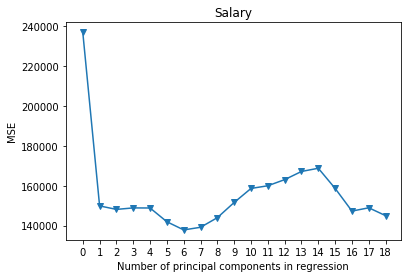

In [17]:
# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
print('no PCA',mse)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, X.shape[-1]):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(np.arange(0,X.shape[-1],1),mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(np.arange(0,X.shape[-1], step=1));

## Visualization and clustering

We are going to explore some dimensionality reduction techniques on the Iris dataset and visualize the low-dimensional representation. The goal is to provide a better understanding of what the dimensionality reduction techniques are doing.

For more resources on data dimensionality reduction refer to:

- [Really nice blogpost detailing dimension reduction and visualization with MNIST](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)
- [The paper on TSNE, if you're interested in the math](http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

### PCA on Iris dataset:
Here we will perform Principal Components Analysis on the iris dataset using SKlearn. 

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [5]:
# Running this cell will take a few seconds

X,y = load_iris(return_X_y = True)

#### Next, for easy visualization, we are going to work with a subset of the data.

In the next cell, extract a subset of the data and perform PCA on it. 

In [8]:
train_x, train_y = X[:500,:], y[:500]

X_reduced = PCA(n_components = 3).fit_transform(train_x)


We will now visualize this data using the two principal dimensions. 

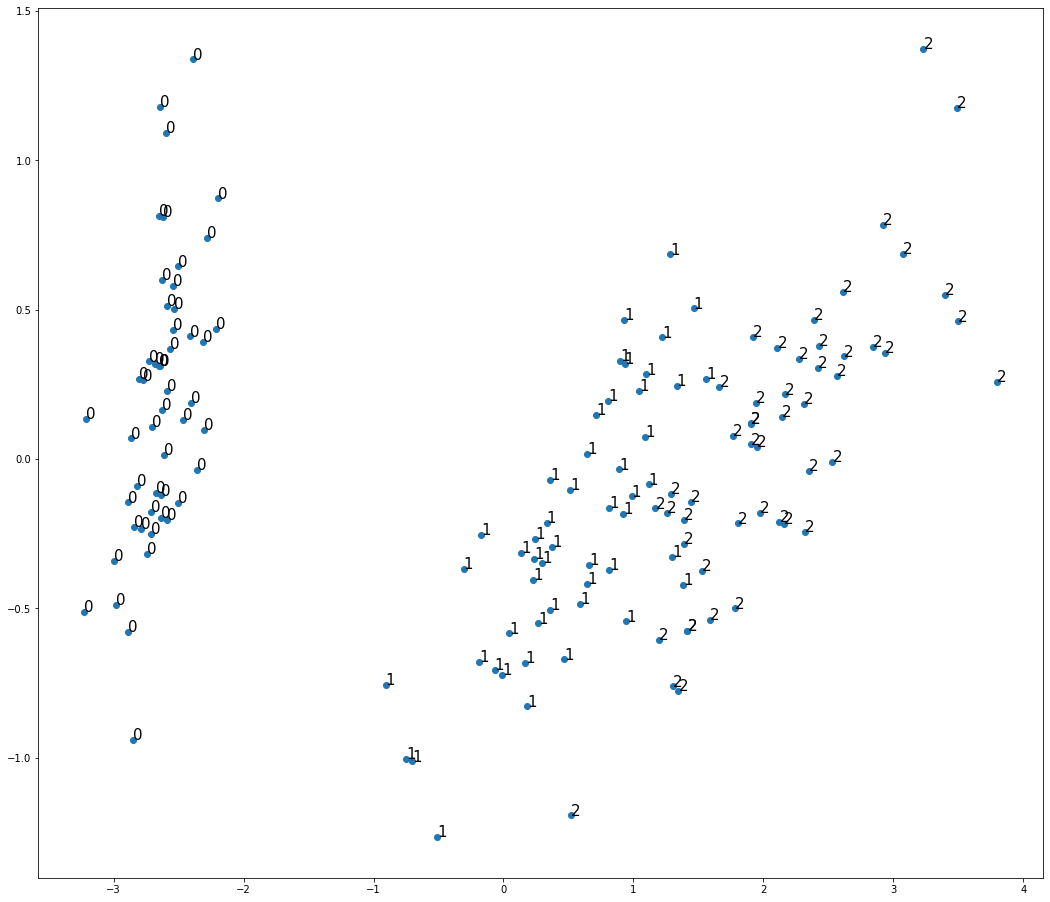

In [9]:
fig  = plt.figure(figsize=(18, 16))
ax = plt.axes()


# TO DO: make a scatter plot of the data using the first two components of your 


We will now visualize this data using the ***three*** principal dimensions. See, if it gets any better.

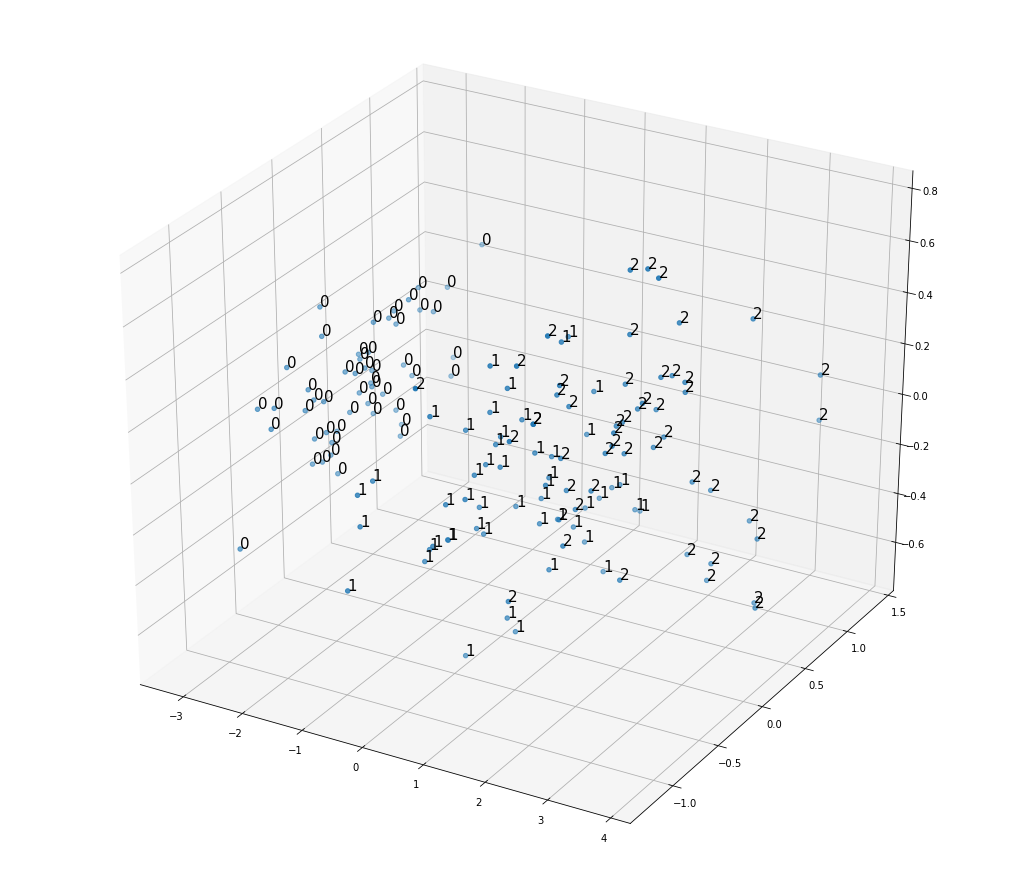

In [10]:


fig  = plt.figure(figsize=(18, 16))
ax = plt.axes(projection='3d')

# TODO: create 3d scatter plot to visualize the projection.


***K-means clustering*** on the Iris dataset using the reduced data using sklearn.

In [13]:
# TODO: using scikit learn implement k means clustering. 
# Since this is Iris, we know that the number of outut categories is 3. Use that as number of clusters



# TODO, next extract the labels of the output k-means. (These labels are just membership to different clusters)
# Remember: K-means does not have any information about the actual labels.
labels = []


We want to visualize how the k-means algorithm has clustered the data.

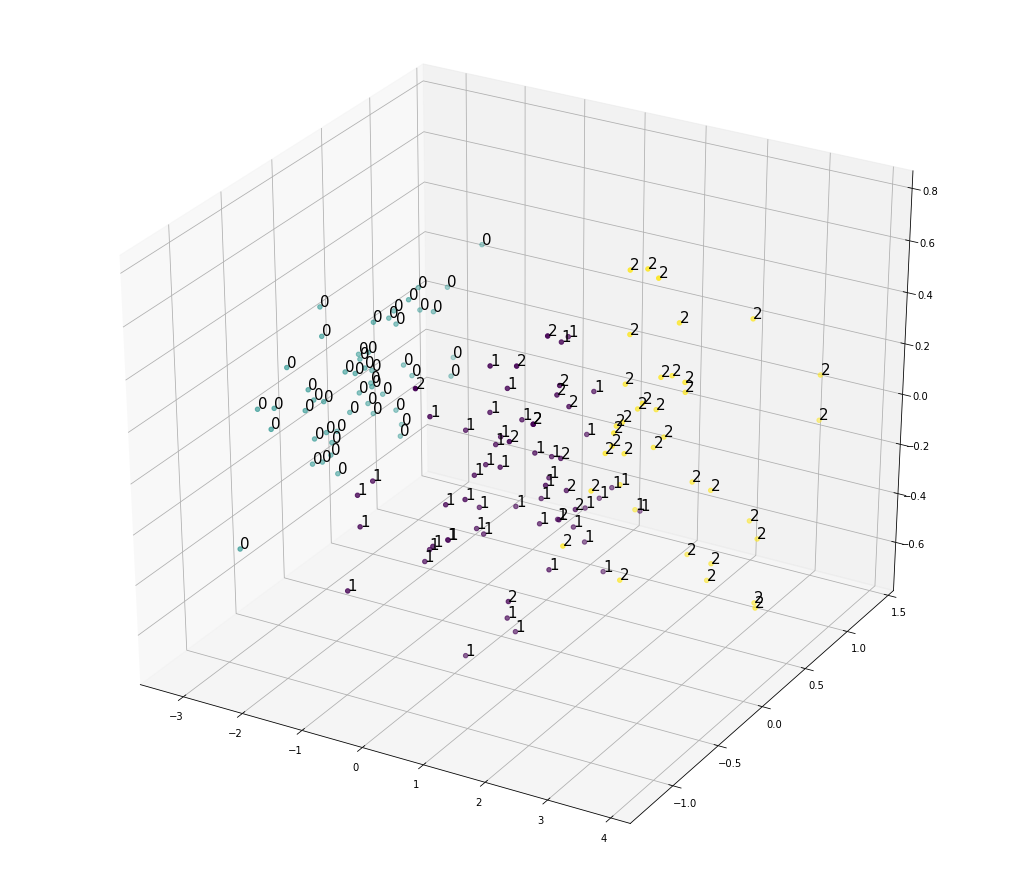

In [14]:
# TODO: create a 2- D scatter plot to show this. You can use colors to represent the categorization by K-means. 
# Also consider annotating the points with the true labels to visually see how K-means has done.

fig  = plt.figure(figsize=(18, 16))
ax = plt.axes()



In [ ]:
# TODO: create a 3- D scatter plot to show this. You can use colors to represent the categorization by K-means. 
# Also consider annotating the points with the true labels to visually see how K-means has done.


fig  = plt.figure(figsize=(18, 16))
ax = plt.axes(projection='3d')


**Play around with the hyperparameters of K-means and visualize the output. See how the clustering changes with each.**

- Initialization method (`init`)
- Number of clusters (`n_clusters`)
- Number of initializations  for k means (`n_init`)

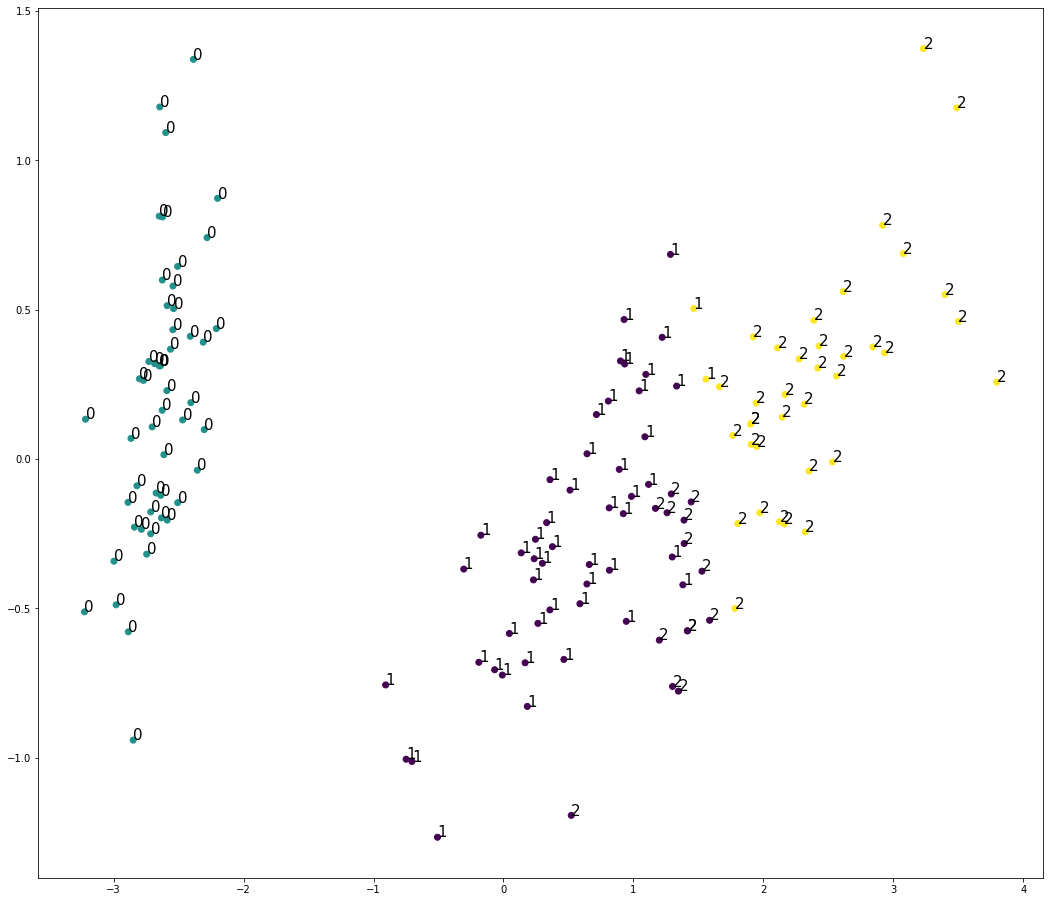

In [20]:
#TODO: use this cell to visualize

fig  = plt.figure(figsize=(18, 16))
ax = plt.axes()

### Elbow plot to determine number of clusters:

For this example, we know exactly what the number of categories are. We therefore know how many clusters there should be. However, for truly unsupervised problems, we need to identify a good value for `k`. 

The elbow plot essentially plots how the sum of square distances of the data points to their closest cluster centers. You can determine this using the attribute `inertia_` in your k-means object.

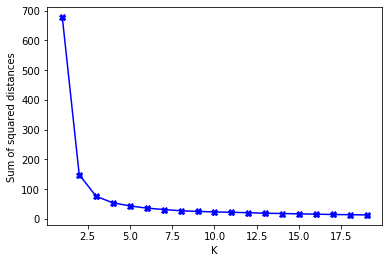

In [21]:
sum_sq_distances = []

# TODO: append values of the sum of squared distance 


    
plt.plot(range(1,20), sum_sq_distances, 'bX-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.show()

**What do you observe?**

**How does this compare with the clusters you chose to begin with?**

### Dimensionality Reduction on MNIST for visualization

In [29]:
# Running this cell will take a few seconds

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        

#### Next, for easy visualization, we are going to work with a subset of the data.

In the next cell, extract a subset of the data and perform PCA on it. 

In [30]:
train_x, train_y = X[:5000,:], y[:5000]

# TODO: perform PCA on the MNIST digits


Visualizing the data using the prinicpal components.

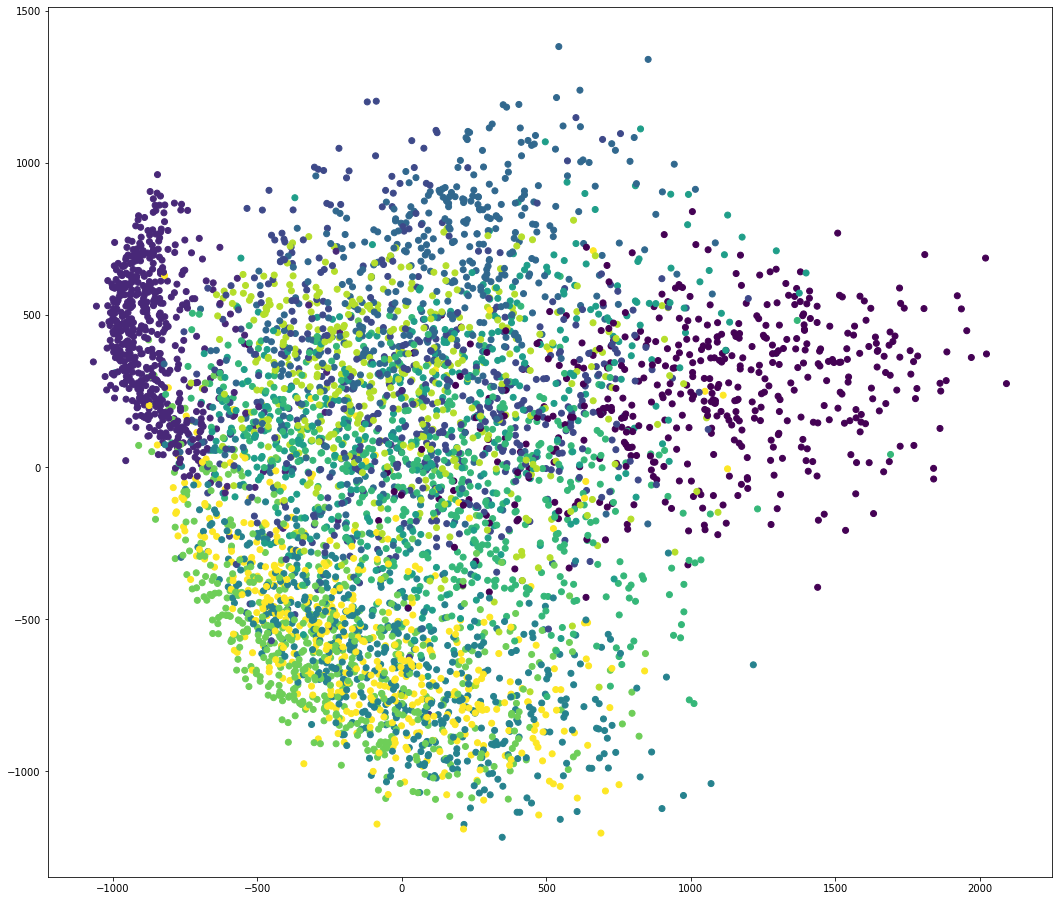

In [31]:
fig  = plt.figure(figsize=(18, 16))
ax = plt.axes()


# TO DO: make a scatter plot of the data using the first two components of your 


### Using t-SNE for visualizing MNIST data:

In [32]:
from sklearn.manifold import TSNE

In [33]:
#TODO: use sklearn tsne to 'embed' the MNIST data into 2-dimensional space using stochastic neighbor embedding


Make a scatter plot of the embedding in the next cell. Color the points based on the true labels of the digits.

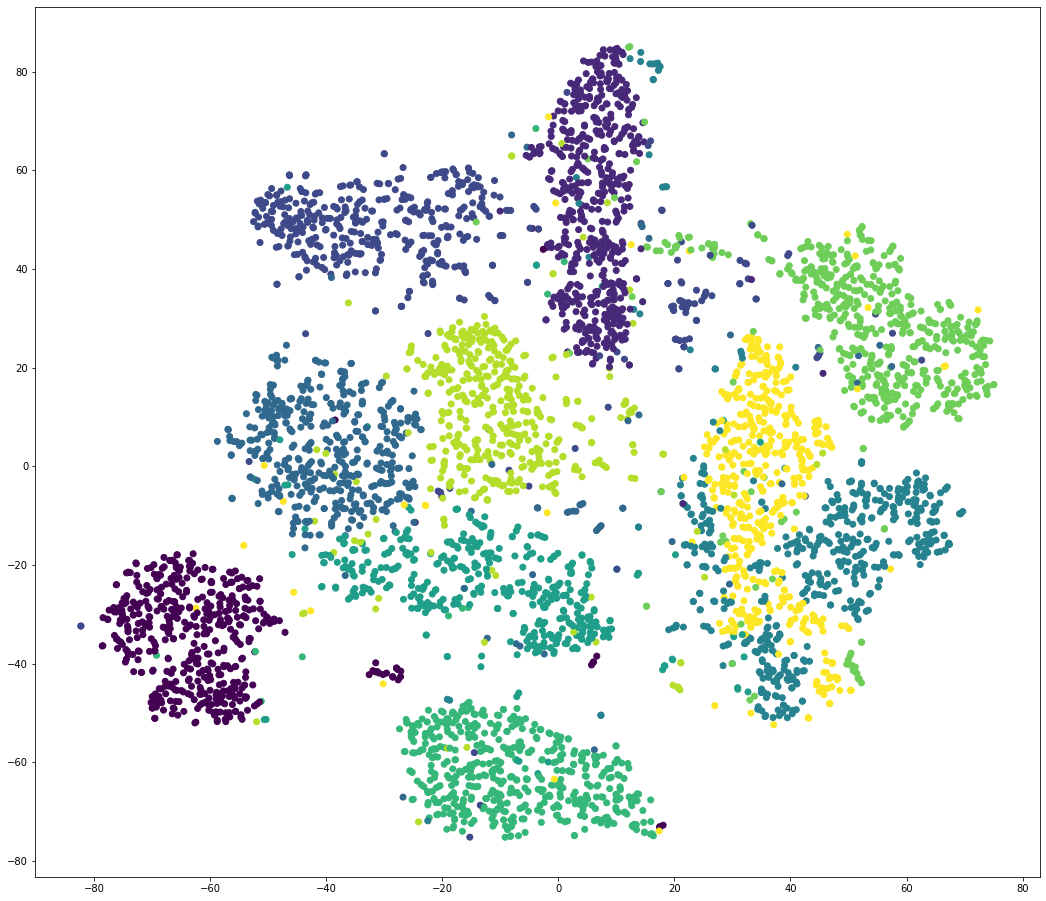

In [36]:


fig  = plt.figure(figsize=(18, 16))
ax = plt.axes()


# TO DO: make a scatter plot of the data using the first two components of your 



#### Exercises for you

1. How does the t-sne visualization look compared to the PCA visualization?

2. Play around with hyperparameters of the two to see how it changes?